In [123]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, deque

def draw(G, **args):
    nx.draw(G, with_labels=True, font_size=8, **args)
    plt.show()

def component(G, N, i):
    C = []
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.append(node)
        for j in G[node]:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components(G):
    C = []
    N = set(G)
    while N:
        C.append(component(G, N, next(iter(N))))
    return C

def component_directed(G, N, i, correct):
    C = set()
    S = []
    S.append(i)
    N.remove(i)
    while S:
        node = S.pop()
        C.add(node)
        neighbours = None
        if correct:
            neighbours = G.successors(node)
        else:
            neighbours = G.predecessors(node)
        for j in neighbours:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

def components_directed(G):
    C = []
    N = set(G)
    while N:
        current_node = next(iter(N))
        first = component_directed(G, N, current_node, correct=True)
        second = component_directed(G, first, current_node, correct=False)
        C.append(second)
        N.update(first)
    return C


Finished building


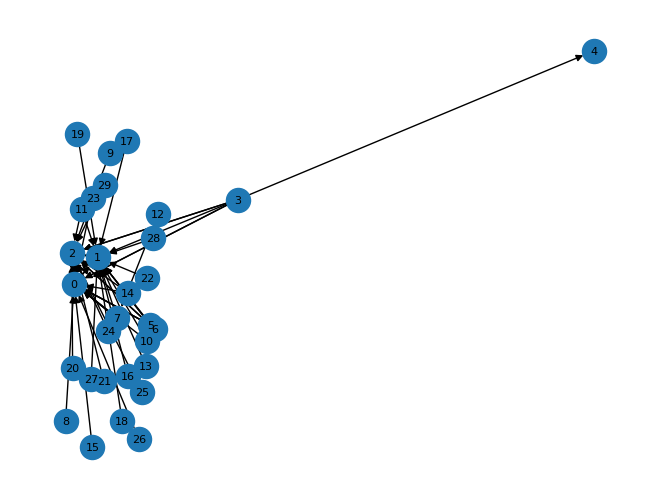


28
3


In [84]:

D2 = nx.scale_free_graph(30)
print("Finished building")
draw(D2)
scc_mine = sorted(components_directed(D2), key=len, reverse=True)
lengths = [len(c) for c in scc_mine]
print()
print(len(lengths))
print(lengths[0])

In [85]:
D = nx.read_pajek('enron.net')
n = len(D)
m = D.number_of_edges()
print(n)
print(m)
lengths_mine = [len(c) for c in sorted(components_directed(D), key=len, reverse=True)]
lengths_nx = [len(c) for c in sorted(nx.strongly_connected_components(D), key=len, reverse=True)]
print(f"Mine: {len(lengths_mine)}, {lengths_mine[0]}")
print(f"Networkx: {len(lengths_nx)}, {lengths_nx[0]}")

87273
1148072
Mine: 78058, 9164
Networkx: 78058, 9164


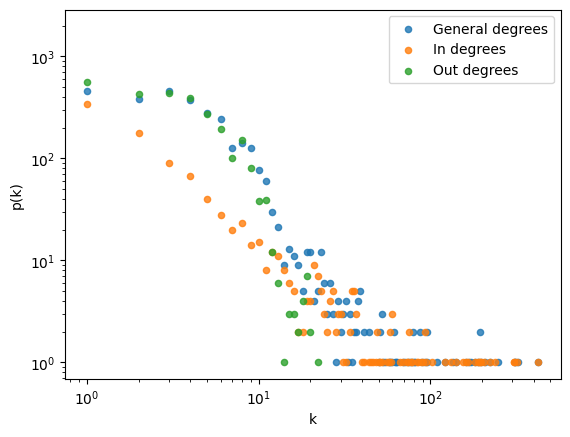

Gamma general: 2.471356639442113
Gamma in: 1.7976323613898257
Gamma out: 3.370638205209159


In [122]:
def calc_gamma(degrees, k_min):
    degrees = degrees[degrees >= k_min]
    n_dot = len(degrees)
    sum_value = np.sum(np.log(degrees / (k_min - 0.5)))
    gamma = 1 + n_dot * (1 / sum_value)
    return gamma

G = nx.read_pajek('lucene.net')
degrees = np.array(sorted([G.degree(n) for n in G.nodes()], reverse=True))
in_degrees = np.array(sorted([G.in_degree(n) for n in G.nodes()], reverse=True))
out_degrees = np.array(sorted([G.out_degree(n) for n in G.nodes()], reverse=True))
count_general = Counter(degrees)
count_in = Counter(in_degrees)
count_out = Counter(out_degrees)
fig = plt.figure()
plt.xscale("log")
plt.yscale("log")
general_dist = plt.scatter(count_general.keys(), count_general.values(), label="General degrees", s=20, alpha=0.8)
in_dist = plt.scatter(count_in.keys(), count_in.values(), label="In degrees", s=20, alpha=0.8)
out_dist = plt.scatter(count_out.keys(), count_out.values(), label="Out degrees", s=20, alpha=0.8)
plt.xlabel("k")
plt.ylabel("p(k)")
plt.legend()
plt.show()

cutoff = 5
gamma_general = calc_gamma(degrees, cutoff)
gamma_in = calc_gamma(in_degrees, cutoff)
gamma_out = calc_gamma(out_degrees, cutoff)
print(f"Gamma general: {gamma_general}")
print(f"Gamma in: {gamma_in}")
print(f"Gamma out: {gamma_out}")

In [124]:
def distance(G, i):
  D = [-1] * len(G) # D = {}
  Q = deque()
  D[i] = 0
  Q.append(i)
  while Q:
    i = Q.popleft()
    for j in G[i]:
      if D[j] == -1: # if j not in D:
        D[j] = D[i] + 1
        Q.append(j)
  return [d for d in D if d > 0]

def distances(G, n = 200):
  D = []
  approx = G.nodes()
  
  if len(G) > n:
    approx = random.sample(G.nodes(), n):
  
  for i in approx:
    D.append(distance(G, i))
  return D
def info(G):
  print("{:>10s} | '{:s}'".format('Graph', G.name))

  n = G.number_of_nodes()
  n0, n1, delta = 0, 0, 0
  print("{:>10s} | {:,d} ({:,d}, {:,d})".format('Nodes', n, n0, n1))

  m = G.number_of_edges()
  print("{:>10s} | {:.2f} ({:,d})".format('Degree', 2 * m / n, delta))

  D = distances(G)
  D = [i for d in D for i in d]

  print("{:>10s} | {:.2f} ({:,d})".format('Distance', sum(D) / len(D), max(D)))
